<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st

In [14]:
#Строим доверительный интервал для a=M(X)

In [15]:
### задаем параметры нормального распредеелния
n=25
a=0
Sigma=1
#########################################
gamma=0.95 ### доверительная вероятность

In [16]:
#### генерируем выборку из нормально распределенной СВ X
X= np.random.normal(a,Sigma,size = n)

In [17]:
### Percent point function =ppf
P_=(1 + 0.9544)/2
t_gamma=st.norm.ppf(P_, loc=0, scale=1)
print("t_gamma=F_s_INVERSE(",P_,")=",t_gamma)
ppp=st.norm.cdf(t_gamma, loc=0, scale=1)

print("P(U<",t_gamma,")=F_S(",t_gamma,")=",ppp)

t_gamma=F_s_INVERSE( 0.9772000000000001 )= 1.9990772149717708
P(U< 1.9990772149717708 )=F_S( 1.9990772149717708 )= 0.9772000000000001


In [18]:
#### Вычисляем "вручную" границы интервальной оценки математического ожидания 
##нормально распределенной СВ X
### для случая известной дисперсии
#### 
P_=1/2+gamma/2
t_gamma=st.norm.ppf(P_, loc=0, scale=1)
a_left_ =X.mean()-Sigma*t_gamma/n**0.5
a_right_=X.mean()+Sigma*t_gamma/n**0.5
print('доверительный интервал для параметра a')
(a_left_,a_right_)

доверительный интервал для параметра a


(-0.6621002678721233, 0.12188532594389839)

In [20]:
#### Вычисляем "вручную" границы интервальной оценки математического ожидания 
##нормально распределенной СВ X
### для случая известной дисперсии
#### с помощью встроенных статистических функций Питона
a_estimate=np.mean(X)
interval_estimate_1=st.norm.interval(confidence=gamma, 
              loc=a_estimate,
              scale=Sigma/np.sqrt(n)) 
print(interval_estimate_1)

(-0.6621002678721233, 0.12188532594389839)


In [20]:
#### Вычисляем границы интервальной оценки математического ожидания при неизвестной дисперсии
#### "вручную"
interval_for_MX_=[0]*2
### Percent point function =ppf= Inverse CDF
t_gamma_0=st.t.ppf(1/2+gamma/2, df=len(X)-1)
print(t_gamma_0)
a_estimate=np.mean(X)
sigma_estimate=np.std(X,ddof=1)
interval_for_MX_[0]=a_estimate-sigma_estimate*t_gamma_0/np.sqrt(n)
interval_for_MX_[1]=a_estimate+sigma_estimate*t_gamma_0/np.sqrt(n)
print(interval_for_MX_)

2.0638985616280205
[-0.37219653238587735, 0.31239492460687335]


In [22]:
### Способ № 1
#### Вычисляем границы интервальной оценки математического ожидания при неизвестной дисперсии
#### с помощью встроенных статистических функц_0, df=len(X)-1,
a_estimate=np.mean(X)
sigma_estimate=np.std(X,ddof=1)
interval_estimate_2=st.t.interval(confidence=gamma, df=len(X)-1,
              loc=a_estimate,
              scale=sigma_estimate/np.sqrt(n)) 
print(interval_estimate_2)

(-0.6489616782658302, 0.10874673633760534)


In [22]:
### Способ № 2
#### Вычисляем границы интервальной оценки математического ожидания при неизвестной дисперсии
#### с помощью встроенных статистических функций Питона
interval_estimate_2=st.t.interval(alpha=gamma, df=len(X)-1,
              loc=a_estimate,
              scale=st.sem(X,ddof=1)) 
print(interval_estimate_2)
##### ПРОВЕРКА 
##### ПРИ ВЫЗОВ
sigma_estimate=np.std(X,ddof=1)
print(st.sem(X,ddof=1),sigma_estimate/np.sqrt(n))

(-0.3721965323858773, 0.3123949246068733)
0.16584910463156172 0.16584910463156172


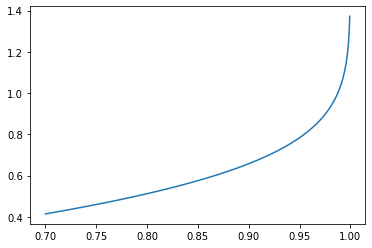

In [24]:
##### Изучаем зависимость точности интервальной оценки для MX при известной дисперсии от надежности 
#### при неизменном объему выборки
#################################
sample = np.random.normal(a, Sigma, n)
a_estimate=np.mean(sample)
##################################
V=500
### массив gamma_ будет содержать V значений надежности
gamma_=[0.0]*V
### массив delta_ будет содержать V значений длин доверительных интервалов, отвечающих соответствующим надежностям
delta_=[0.0]*V
gamma__0=0.7
gamma__1=0.9999999999
h=(gamma__1-gamma__0)/V
for i in range(V):
    gamma_[i]=gamma__0+i*h
    interval_estimate_MX=st.norm.interval(alpha=gamma_[i], 
              loc=a_estimate, 
              scale=Sigma/np.sqrt(n)) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
###print(delta_)
plt.plot(gamma_,delta_)

Материалы к Лабораторной Работе №2

НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ. Оценивание надежности интервальной оценки M(X)

In [42]:
### задаем параметры нормального распредеелния
n=25
a=0
Sigma=1
gamma_=0.95
P_=1/2+gamma_/2####  уровень квантиля
#########################################
t_gamma=2.064 ## n=25###  gamma_=0.95  см. приложение 8
t_gamma_=st.t.ppf(P_, df=n-1)### ищем t_gamma с помощью встроенной функции ppf
(t_gamma,t_gamma_)

(2.064, 2.0638985616280205)

In [48]:
V=100 ### число точечных оценок надежности gamma=0.95
M=4000 ### число интервальных оценок
################################
COUNT_=[0]*V
P_hat=[0.0]*V
a_left=[0.0]*M
a_right=[0.0]*M
for j in range(V):
    for i in range(M):
        X= np.random.normal(a,Sigma,size = n)
        S=np.std(X,ddof=1)
        a_left[i] =X.mean()-S*t_gamma/n**0.5
        a_right[i]=X.mean()+S*t_gamma/n**0.5
    s0=pd.Series(data=a_left)
    s1=pd.Series(data=a_right)
    COUNT_[j]=((s0<a)&(s1>a)).sum()
    P_hat[j]=COUNT_[j]/M
print(P_hat)

[0.948, 0.947, 0.9525, 0.94675, 0.95375, 0.9445, 0.9495, 0.953, 0.9545, 0.94775, 0.94925, 0.94925, 0.95, 0.95075, 0.95025, 0.94875, 0.95175, 0.9475, 0.9505, 0.94925, 0.94875, 0.9465, 0.94825, 0.95375, 0.94775, 0.946, 0.947, 0.94925, 0.9545, 0.951, 0.943, 0.9485, 0.945, 0.948, 0.95175, 0.9535, 0.9445, 0.94725, 0.9545, 0.9495, 0.94575, 0.946, 0.95025, 0.95225, 0.952, 0.951, 0.9465, 0.9485, 0.94925, 0.94275, 0.948, 0.95425, 0.951, 0.95325, 0.95275, 0.947, 0.9515, 0.94825, 0.9475, 0.9525, 0.9515, 0.95575, 0.95325, 0.9455, 0.9505, 0.94825, 0.947, 0.94825, 0.95675, 0.9505, 0.9535, 0.945, 0.949, 0.952, 0.94625, 0.94825, 0.947, 0.943, 0.952, 0.952, 0.9535, 0.9435, 0.95, 0.9505, 0.95375, 0.94825, 0.95075, 0.94925, 0.94775, 0.9475, 0.9535, 0.95125, 0.9435, 0.95425, 0.946, 0.95375, 0.95325, 0.952, 0.949, 0.952]


In [56]:
print(np.mean(P_hat),np.std(P_hat,ddof=1),len(P_hat))

0.9496149999999999 0.0031535654024413056 100


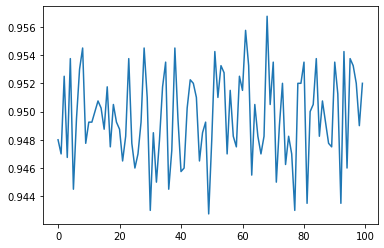

In [57]:
plt.plot(P_hat)

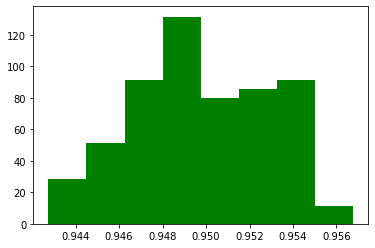

In [58]:
count, bins, ignored  = plt.hist(P_hat,bins='sturges',color='g',density='True')

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


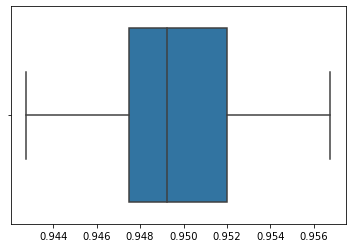

In [55]:
import seaborn as sb
W=sb.boxplot(P_hat)
print(W)

In [62]:
n=25
delta_0=39.4 ### n=25 см. приложение 4
delta_1=12.4 ### n=25 см. приложение 4

P_0=1/2+gamma_/2####  уровень квантиля
P_1=1/2-gamma_/2####  уровень квантиля
#########################################
delta_00=st.chi2.ppf(P_0, df=n-1)### ищем квантили с помощью встроенной функции ppf
delta_11=st.chi2.ppf(P_1, df=n-1)
print(delta_0,delta_00)
print(delta_1,delta_11)

39.4 39.36407702660391
12.4 12.401150217444439


In [63]:
V=50 ### число точечных оценок надежности gamma=0.95
M=4000 ### число интервальных оценок
COUNT_=[0]*V
sigma_left=[0.0]*M
sigma_right=[0.0]*M
COUNT_=[0]*V
S2_left=[0.0]*M
type(S2_left)
S2_right=[0.0]*M
for j in range(V):
    for i in range(M):
        X= np.random.normal(a,Sigma,size = n) ### 
        DX=Sigma**2
        D_hat=np.var(X,ddof=1)
        S2_left[i] =(n-1)*D_hat/delta_0
        S2_right[i]=(n-1)*D_hat/delta_1
    s0=pd.Series(data=S2_left)
    s1=pd.Series(data=S2_right)
    COUNT_[j]=((s0<DX)&(s1>DX)).sum()
    COUNT_[j]=COUNT_[j]/M
print(COUNT_)

[0.9535, 0.94775, 0.952, 0.95425, 0.9565, 0.949, 0.9475, 0.95225, 0.95375, 0.95625, 0.948, 0.953, 0.947, 0.95375, 0.951, 0.95025, 0.94425, 0.95025, 0.95225, 0.9505, 0.9525, 0.9565, 0.95175, 0.94625, 0.951, 0.94675, 0.95325, 0.95175, 0.949, 0.95075, 0.948, 0.95175, 0.95175, 0.94875, 0.9495, 0.948, 0.951, 0.95275, 0.9505, 0.95475, 0.955, 0.94725, 0.9525, 0.94925, 0.94775, 0.955, 0.95, 0.95075, 0.95, 0.95325]


In [60]:
s=pd.DataFrame(data=COUNT_,columns=['COUNT'])
s

,COUNT
0,0.94950
1,0.95225
2,0.95350
3,0.94775
4,0.94950
5,0.94850
6,0.94625
7,0.95375
8,0.95225
9,0.95075


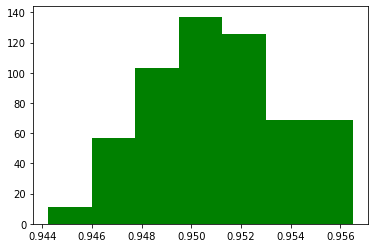

In [66]:
count, bins, ignored  = plt.hist(COUNT_,bins='sturges',color='g',density='True')

<AxesSubplot:>

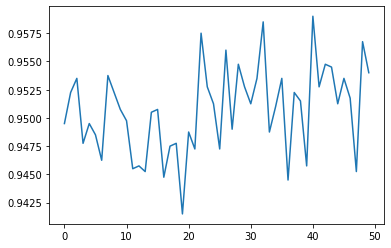

In [64]:
s.COUNT.plot()

In [65]:
(s.mean(),s.std())

(COUNT    0.950685
 dtype: float64,
 COUNT    0.003903
 dtype: float64)